### 📦 Step 1 — Import Required Libraries

In this step, we import all the necessary Python libraries for data handling, visualization, preprocessing, and machine learning.

- **pandas, numpy** → For data manipulation and numerical operations  
- **matplotlib, seaborn** → For data visualization  
- **sklearn.datasets.load_iris** → To load the Iris dataset  
- **train_test_split** → To split the dataset into training and testing sets  
- **StandardScaler** → To normalize/scale the features for KNN  
- **KNeighborsClassifier** → KNN model implementation from scikit-learn  
- **accuracy_score, confusion_matrix, classification_report** → Model evaluation metrics


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

### Step 2 — Load the Iris Dataset

We use **`load_iris()`** from `sklearn.datasets` to load the classic Iris dataset.  
This dataset contains:
- **150 samples** of iris flowers
- **4 features**: sepal length, sepal width, petal length, and petal width
- **Target classes**: Setosa, Versicolor, Virginica


In [16]:
iris = load_iris()

### Step 3 — Define Features and Target

- **`X`**: Feature matrix containing the 4 numerical measurements of the iris flowers.  
- **`y`**: Target array with class labels (`0`, `1`, `2`) corresponding to the three iris species.  


In [3]:
X = iris.data
y = iris.target

### Step 4 — Store Feature and Target Names

- **`feature_names`**: List of human-readable names for each feature in the dataset (e.g., *sepal length*, *petal width*).  
- **`target_names`**: List of species names corresponding to the target classes (`Setosa`, `Versicolor`, `Virginica`).  
This makes outputs and visualizations easier to interpret.


In [4]:
feature_names = iris.feature_names
target_names = iris.target_names

### Step 5 — Feature Scaling

We apply **StandardScaler** to normalize the features so that each has:  
- Mean = 0  
- Standard Deviation = 1  

This step is important for KNN because the algorithm is **distance-based**, and scaling ensures all features contribute equally to distance calculations.


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Step 6 — Split the Dataset into Training and Testing Sets

We use **`train_test_split()`** to divide the scaled dataset into:  
- **Training set (80%)** → Used to train the KNN model  
- **Testing set (20%)** → Used to evaluate the model’s performance  

**Parameters:**
- `test_size=0.2` → 20% data for testing  
- `random_state=42` → Ensures reproducibility  
- `stratify=y` → Maintains the same class proportion in train and test sets  


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

### Step 7 — Define K Values to Test

- **`k_values`**: A range of `K` (number of neighbors) from 1 to 15 to evaluate.  
- **`accuracies`**: An empty list to store the accuracy scores for each value of `K`.  

We will loop through these K values to find the optimal one that gives the best accuracy.


In [7]:
k_values = range(1, 16)
accuracies = []

### Step 8 — Train and Evaluate KNN for Different K Values

For each value of **K** in `k_values`:
1. Create a **KNeighborsClassifier** with `n_neighbors = k`.
2. Train the model on the training set (`X_train`, `y_train`).
3. Predict the labels for the test set (`X_test`).
4. Calculate the **accuracy** and store it in the `accuracies` list.

This loop helps us compare performance across different K values.


In [8]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

### Step 9 — Visualize Accuracy vs. K

We create a line plot to visualize how accuracy changes with different values of **K**:
- **X-axis** → Number of Neighbors (K)  
- **Y-axis** → Model Accuracy  
- The plot helps us identify the optimal K value that gives the highest accuracy.

A grid is added for easier reading, and markers (`'o'`) show the exact data points.


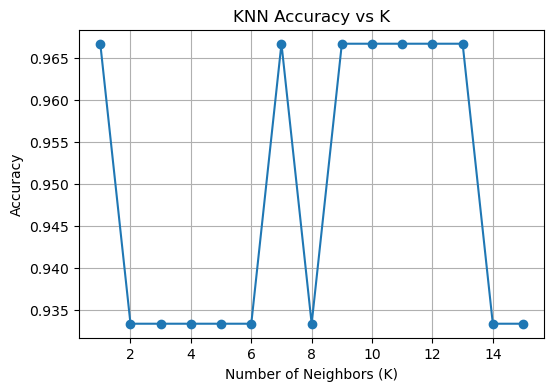

In [9]:
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs K')
plt.grid(True)
plt.show()

### Step 10 — Find the Best K Value

- Use **`np.argmax(accuracies)`** to find the index of the highest accuracy.  
- Retrieve the corresponding K value from `k_values`.  
- Print the **best K** that gives the highest classification accuracy.  


In [10]:
best_k = k_values[np.argmax(accuracies)]
print(f"Best K: {best_k}")

Best K: 1


### Step 11 — Initialize Final KNN Model

Create the final **KNeighborsClassifier** using the **best K value** found in the previous step.  
This model will now be trained on the training set and evaluated for final performance.


In [11]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)

### Step 12 — Train the Final KNN Model

Fit (`train`) the final KNN model on the **training data** (`X_train`, `y_train`) so it can learn the patterns and relationships in the dataset.


In [12]:
knn_final.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Step 13 — Make Predictions with the Final Model

Use the trained KNN model to **predict** the class labels for the **test set** (`X_test`).  
The predictions are stored in `y_pred_final` for further evaluation.


In [13]:
y_pred_final = knn_final.predict(X_test)

### Step 14 — Evaluate Model Performance

We evaluate the final KNN model using:
- **Accuracy** → Overall percentage of correct predictions.
- **Classification Report** → Shows precision, recall, f1-score, and support for each class.  
The `target_names` are used to display actual class names (Setosa, Versicolor, Virginica) instead of numeric labels.


In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final, target_names=target_names))

Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Step 15 — Confusion Matrix Visualization

We create and visualize a **confusion matrix** to understand the model’s classification performance in detail.

- **Rows** → Actual classes  
- **Columns** → Predicted classes  
- **Diagonal values** → Correct predictions for each class  

The heatmap (Seaborn) highlights where the model is making correct vs. incorrect predictions, making it easier to analyze performance per class.


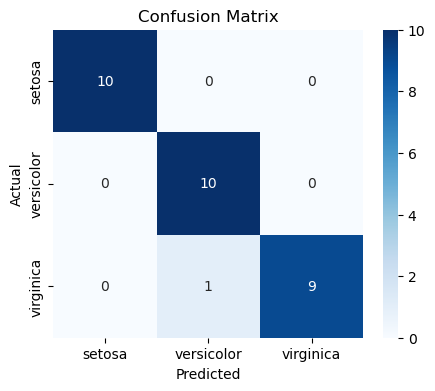

In [15]:
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()